In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("automobileEDA.csv")

In [4]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [13]:
df2 = df[["wheel-base", "engine-size","length", "height", "width", "highway-mpg", "price"]]
df2.tail()
df2.head()

,wheel-base,engine-size,length,height,width,highway-mpg,price
0,88.6,130,0.811148,48.8,0.890278,27,13495.0
1,88.6,130,0.811148,48.8,0.890278,27,16500.0
2,94.5,152,0.822681,52.4,0.909722,26,16500.0
3,99.8,109,0.848630,54.3,0.919444,30,13950.0
4,99.4,136,0.848630,54.3,0.922222,22,17450.0


In [14]:
df2.corr()

,wheel-base,engine-size,length,height,width,highway-mpg,price
wheel-base,1.000000,0.572027,0.876024,0.590742,0.814507,-0.543304,0.584642
engine-size,0.572027,1.000000,0.685025,0.074694,0.729436,-0.679571,0.872335
length,0.876024,0.685025,1.000000,0.492063,0.857170,-0.698142,0.690628
height,0.590742,0.074694,0.492063,1.000000,0.306002,-0.104812,0.135486
width,0.814507,0.729436,0.857170,0.306002,1.000000,-0.680635,0.751265
highway-mpg,-0.543304,-0.679571,-0.698142,-0.104812,-0.680635,1.000000,-0.704692
price,0.584642,0.872335,0.690628,0.135486,0.751265,-0.704692,1.000000


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [17]:
x = df['highway-mpg']
y = df['price']

In [18]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


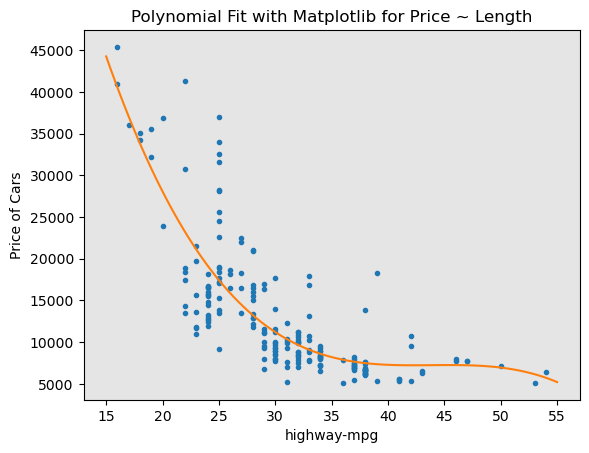

In [19]:
PlotPolly(p, x, y, 'highway-mpg')

In [20]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


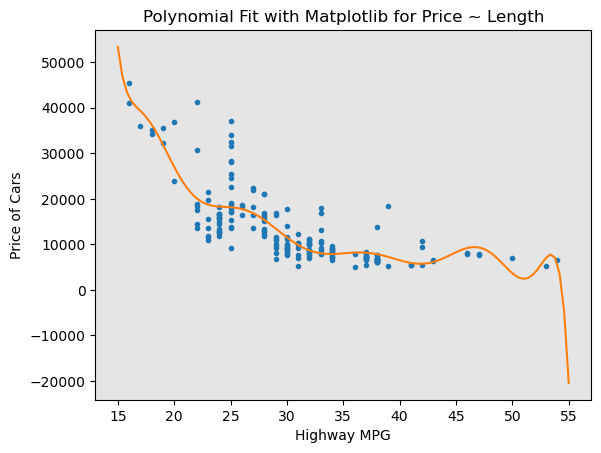

In [21]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p)
PlotPolly(p1,x,y, 'Highway MPG')

In [22]:
from sklearn.metrics import r2_score

In [23]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
mean_squared_error(df['price'], p(x))

20474146.426361218

In [26]:
x1 = df['city-mpg']
y1 = df['price']

In [27]:
f1 = np.polyfit(x1, y1, 3)
p1 = np.poly1d(f1)
print(p1)

        3       2
-2.668 x + 287 x - 1.02e+04 x + 1.275e+05


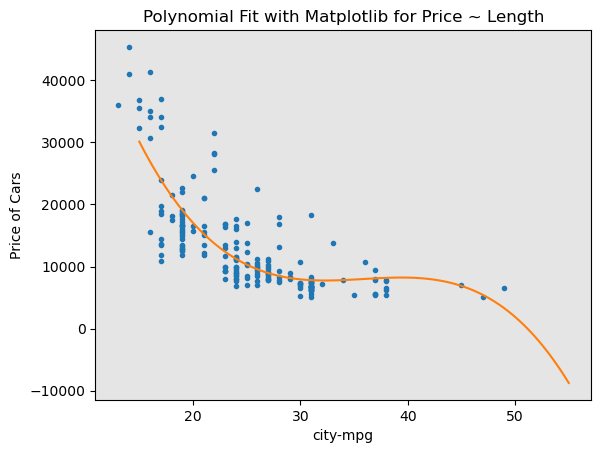

In [28]:
PlotPolly(p1, x1, y1, 'city-mpg')

In [29]:
np.polyfit(x1, y1, 3)

array([-2.66752889e+00,  2.87049531e+02, -1.01956042e+04,  1.27481687e+05])

        3       2
-2.668 x + 287 x - 1.02e+04 x + 1.275e+05


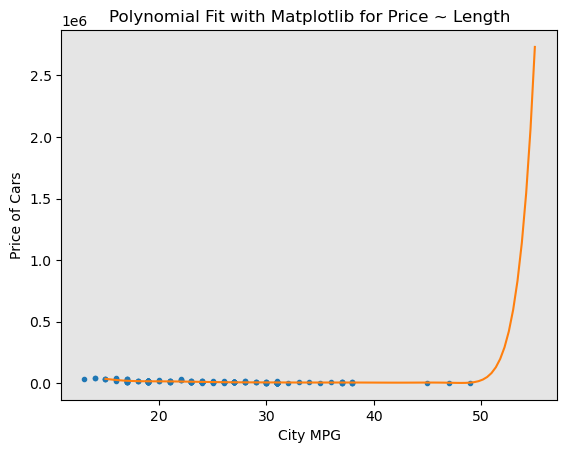

In [30]:
f11 = np.polyfit(x1, y1, 11)
p11 = np.poly1d(f11)
print(p1)
PlotPolly(p11,x1,y1, 'City MPG')

In [31]:
r_squared = r2_score(y, p(x1))
print('The R-square value is: ', r_squared)

The R-square value is:  -0.4550947443137672


In [32]:
mean_squared_error(df['price'], p(x1))

91440562.15798521